In [ ]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.decomposition import PCA
# import mglearn

In [ ]:
# Upload file CSV
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Baca dataset
df = pd.read_csv(file_name)

# Tampilkan informasi awal
print("Data Awal:")
print(df.head())
print("\nInformasi Dataset:")
print(df.info())

# Cek missing values
print("\nJumlah Missing Values:")
print(df.isnull().sum())

# Nama kolom dataset
print("\nNama Kolom Dataset:")
print(df.columns)


Saving CitarumWater.csv to CitarumWater.csv
Data Awal:
   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
Rang

In [ ]:
# Pastikan kolom target benar
kolom_target = "Class"
kolom_target = kolom_target.strip()

if kolom_target not in df.columns:
    raise KeyError(f"Kolom target '{kolom_target}' tidak ditemukan dalam dataset. Periksa kembali nama kolom.")

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=[kolom_target])
y = df[kolom_target]

# Pilih hanya kolom numerik untuk normalisasi
X = X.select_dtypes(include=[np.number])

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Buat model Logistic Regression
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(label_binarize(y_test, classes=np.unique(y)), y_prob, multi_class='ovr')



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# Menampilkan hasil evaluasi
print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")


Akurasi: 0.9660
Presisi: 0.9658
Recall: 0.9660
F1-score: 0.9655
AUC: 0.9913


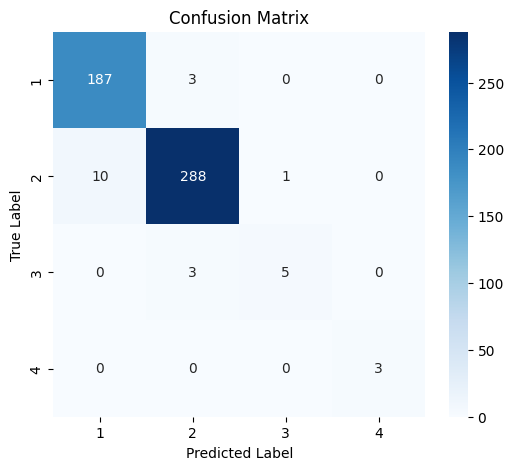

In [ ]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


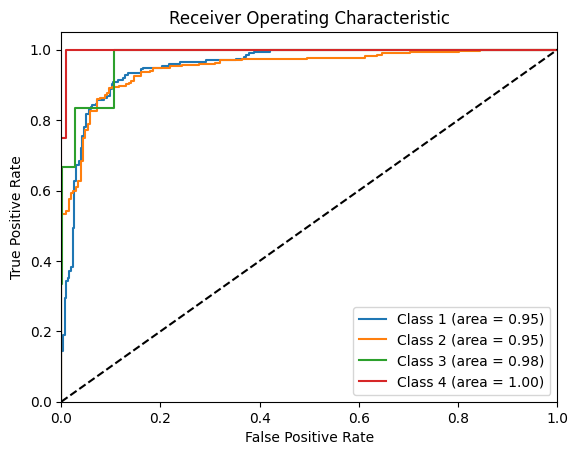

In [ ]:

# Plot ROC curve for each class
plt.figure()
n_classes = len(model.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=model.classes_[i])
    plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (area = {roc_auc_score(y_test == model.classes_[i], y_pred_proba[:, i]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from IPython.display import display, Math

# Explanation of mathematical equations
# Logistic Regression Equation
display(Math(r'h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}'))

# Accuracy
display(Math(r'Accuracy = \frac{TP + TN}{TP + TN + FP + FN}'))

# Precision
display(Math(r'Precision = \frac{TP}{TP + FP}'))

# Recall
display(Math(r'Recall = \frac{TP}{TP + FN}'))

# F1 Score
display(Math(r'F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}'))

# AUC
display(Math(r'AUC = \int_{0}^{1} TPR \, d(FPR)'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>